# Assignment 2

## Machine Learning Techniques

This assignment is split into 3 sections, roughly corresponding to the contents of each of the 3 weeks in the Machine Learning module. 

All assignments are presented as Jupyter notebooks. You will fork the repository to have your own access to all files. You can edit this notebook directly with your answers and push your changes to GitHub. 

### **The goal of this assignment is to use different ML techniques to explore your data, find patterns in it, and eventually build a model that will allow us to predict stellar mass & redshift of galaxies *without doing SED fitting*.**

# Section 0: Data Preprocessing

Before we delve into machine learning, it's a good idea to look at our data, pick which sample we want to work with, etc.

The code below loads in the input data catalog:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing
import sklearn.cluster
from sklearn.decomposition import PCA
import scipy.stats

In [2]:
from astropy.table import Table
from astropy.io import fits
with fits.open('../data/sw_input.fits') as f:
    df = Table(f[1].data).to_pandas()
    f.close()
    
# Display the top 3 rows of the dataframe
df.head(3)

with fits.open('../data/sw_output.fits') as f:
    df_out = Table(f[1].data).to_pandas()
    f.close()
    
# Display the top 3 rows of the dataframe
df.head(3)

,id,ra,dec,redshift,PLATE,MJD,FIBERID,designation,flux0_u,flux0_u_e,...,flux_w2_e,flux_w3,flux_w3_e,flux_w4,flux_w4_e,extin_u,extin_g,extin_r,extin_i,extin_z
0,3,337.450310,1.266134,0.088372,376,52143,404,J222948.07+011558.1,0.000031,0.000003,...,0.000049,4.172000e-07,0.000209,0.000002,0.001187,0.341327,0.265960,0.183990,0.136724,0.101698
1,5,338.115522,1.270146,0.163800,376,52143,567,J223227.69+011612.6,0.000011,0.000004,...,0.000111,9.851000e-07,0.000493,0.000004,0.001883,0.368063,0.286793,0.198402,0.147434,0.109664
2,8,341.101481,1.266255,0.143369,378,52146,404,J224424.38+011558.3,0.000017,0.000003,...,0.000039,1.013700e-06,0.000507,0.000008,0.003856,0.337630,0.263079,0.181997,0.135243,0.100596


In [3]:
np.random.seed(69)

In [4]:
## Removing the bad data

new_df=df.copy(deep=True)
new_df_out=df_out.copy(deep=True)
for i in range(8,len(df.T)):
    col_name=df.columns[i]
    cond=(new_df[col_name]<=9.9)&(new_df[col_name]!=0)
    new_df=new_df[cond]
    new_df_out=new_df_out[cond]

#cond=(new_df_out['flag']==1)
#new_df=new_df[cond]
#new_df_out=new_df_out[cond]

In [5]:
col_out=df_out.columns
for i in range(len(col_out)):
    print(i,col_out[i])

0 id
1 lmass2_5_all
2 lmass16_all
3 lmass50_all
4 lmass84_all
5 lmass97_5_all
6 lsfr2_5_all
7 lsfr16_all
8 lsfr50_all
9 lsfr84_all
10 lsfr97_5_all
11 lssfr2_5_all
12 lssfr16_all
13 lssfr50_all
14 lssfr84_all
15 lssfr97_5_all
16 ldust2_5_all
17 ldust16_all
18 ldust50_all
19 ldust84_all
20 ldust97_5_all
21 mu2_5_all
22 mu16_all
23 mu50_all
24 mu84_all
25 mu97_5_all
26 tau_v2_5_all
27 tau_v16_all
28 tau_v50_all
29 tau_v84_all
30 tau_v97_5_all
31 vmax
32 lrest_u
33 lrest_g
34 lrest_r
35 lrest_i
36 lrest_z
37 lrest_w1
38 lrest_w2
39 lrest_w3
40 lrest_w4
41 flag_r
42 flag_w
43 flag_w1
44 flag_w2
45 flag_w3
46 flag_w4
47 flag_chi2
48 flag


In [6]:
print(df.shape)
print(new_df.shape)

(858365, 49)
(238806, 49)


#### Question 1

Look at all the column names. Choose which columns have *meaningful* data, i.e. have data we want to use in our machine learning to predict stellar mass and/or redshift. Why did you choose these ones?

<font color='red'>
Stellar masses can be estimated from colors. So we will need the fluxes in more than 1 band. I thought that we might need extinction since extinction affects galaxy colors. However, I did not end up using extinctions as the fluxes are better at describing galaxy colors than the extinction in each bands. For the fluxes, I am using the extinction corrected fluxes since extinction affects galaxy colors.

#### Question 2

Choose a reasonably-sized subset of your data ($10^3 \sim 10^4$ or so galaxies)<br>
Make sure to save your subset, or at least the IDs you chose, for later - you will need them!

In [7]:
# Placeholder

size=len(new_df)
choice=np.random.choice(size-1,10**4,replace=False)
#np.save('assignment2_galaxy_index',choice)



In [8]:
choice=np.load('assignment2_galaxy_index.npy')
our_sample=new_df.iloc[choice]
out_sample=new_df_out.iloc[choice]

#### Question 3

It is often useful (and sometimes required) to *normalize* your data, i.e. for each parameter, subtract the mean of that parameter from each point in the sample, and divide by the standard deviation. For example, for mass, for each galaxy $i$, you can calculate

$$ M_{norm, i} = \frac{M_i - \langle M \rangle}{\sigma_M}$$

There are other ways to pre-process data (e.g., normalize by quantiles, or redefine variables such that they match some distribution).

* For each column you chose, normalize the data in your sample in some way.
* For one parameter, make a histogram of the original data, and the data after normalization. Do the histograms look as you expected them to?

In [9]:
#Chosen data

chosen_ones=np.array([our_sample['flux_u'],our_sample['flux_g'],our_sample['flux_r'],our_sample['flux_i'],our_sample['flux_z'],our_sample['flux_w1'],our_sample['flux_w2'],our_sample['flux_w3'],our_sample['flux_w4']])

In [10]:
means=np.mean(chosen_ones,axis=1)
std=np.std(chosen_ones,axis=1,ddof=1)
print(means)
data_keep_norm=((chosen_ones.T-means)/std).T

[0.00017962 0.00059818 0.00113817 0.00160933 0.00208272 0.00180469
 0.00120008 0.00510364 0.00701559]


Text(0, 0.5, 'Counts')

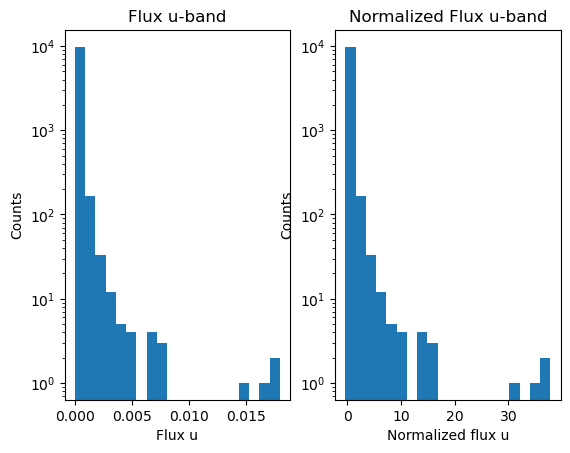

In [13]:
fig, ((ax1),(ax2)) = plt.subplots(1,2)
ax1.hist(chosen_ones[0],bins=20)#,range=[np.min(data_keep[0]),np.max(data_keep[0])])
ax1.set_title('Flux u-band')
ax2.hist(data_keep_norm[0],bins=20)
ax2.set_title('Normalized Flux u-band')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Flux u')
ax2.set_xlabel('Normalized flux u')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Counts')

<font color='red'>
The histograms look like I expect them to. I expected both histograms to look the same since the normalization should not affect the histogram beyond affecting the values on the x-axis. 

# Section 1: Data Compression

#### Question 1

What is a dimensionality reduction technique? Why would you use one?

<font color='red'>
It transforms your data to a lower dimensional space while trying to keep as much information as possible. You can use dimensionality reduction techniques to make a model less complex, to make your code/analysis run faster, to make it easier to understand and visualize the data. 

#### Question 2

There are many different data compression techniques: PCA, UMAP, tSNE, VAE... Pick two of these methods, and explain briefly: 
* How do each one of them work?
* What are advantages or disadvantages of each method?
* When would you use one over the other?

<font color='red'>
    
## PCA

Principal component analysis: "Unsupervised technique for extracting variance structure from high dimensional datasets." - Marco, 2024
PCA is a method that reduces the dimensionality of a dataset by finding new, more meaningful, dimensions. PCA looks at the data space and finds axes with the most variance. All the principal components are orthogonal. So the first component is in the direction of the highest variance, and the subsequent components are taken to be in the direction with the most variance which is also orthogonal to all the already determined principal components. 

Pros: 1) Simple to implement. 2) Fast computation when obtaining few dimensions. 3) Identifies the most important variables/components 4) Useful for noise reduction.
        

Cons: 1) Requires linear relations. This means that it will miss any non-linear structures. 2) Is affected by the scale of the variables. Not great if your dataset spans many order of magnitudes. Can be fixed by normalizing the data.  


## UMAP (For Liza)

Uniform Manifold Approximation and Projection: It is a non-linear dimensionality reduction technique. "UMAP is constructed
from a theoretical framework based in Riemannian geometry and algebraic topology." - McInnes et al. (2020) https://arxiv.org/pdf/1802.03426.pdf
It is great for data visualization and clustering. 


Pros: 1) It can capture both local and global structures. 2) Can be used to find non-linear relationships in your dataset. 3) Great method to use for clustering. 

Cons: 1) Computationaly expensive for large datasets. 2) Sensitive to the choice hyperparameters (this is discussed later)

Compare: 1) When looking to keep both local and global features of the dataset, UMAP is a better method to use than PCA since PCA chooses components based on the highest variance and will most likely lose some local features. 2) UMAP should be used instead of PCA when there is non-linear structure as PCA can only deal with linear relations. UMAP, tSNE and VAE can be used to study non-linear relationships. 3) PCA is a better choice than UMAP for quickly reducing high dimensional data to few dimensions. If you know that your data is well described by linear relationships, PCA is a good method to use.

#### Question 3

Pick one of the dimensionality reduction method

> Most already have easy-to-use implementations so you don't have to code them from scratch: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [UMAP](https://umap-learn.readthedocs.io/en/latest/index.html), [tSNR](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Training something like a Variational Autoencoder is a more involved task and requires access to a GPU.

Do the following:    
1. Reduce your data to 2 dimensions using your chosen algorithm
2. Save your output
    > Remember to keep the IDs with the principal components, so that you can easily see which galaxy those values are for later
3. Plot the two principal variables against each other and describe what you see
    * Are there any obvious patterns in your data?
    * Are there any clusters?!

<font color='red'>
I chose UMAP as my dimensionality method. For Liza.

/Users/marie-joellegingras/opt/anaconda3/envs/prospector/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


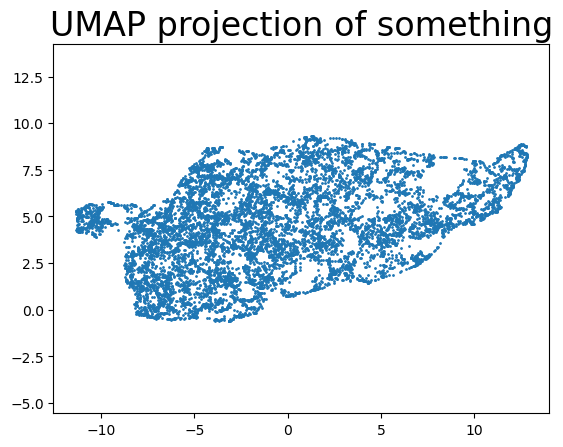

In [14]:
reducer = umap.UMAP(random_state=69,init='pca',n_neighbors=10) 

crap=np.array([our_sample['flux_u'],our_sample['flux_g'],our_sample['flux_r'],our_sample['flux_i'],our_sample['flux_z'],our_sample['flux_w1'],our_sample['flux_w2'],our_sample['flux_w3'],our_sample['flux_w4']])#,our_sample['extin_u'],our_sample['extin_g'],our_sample['extin_r'],our_sample['extin_i'],our_sample['extin_z']])

wtf=sklearn.preprocessing.RobustScaler().fit_transform(crap.T)
result_comp = reducer.fit_transform(wtf)


plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=1)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24)
#plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of something', fontsize=24);

<font color='red'>
I see 2 clusters in my data. There is a small cluster on the top left and the big main cluster. There could be a very tiny 3rd cluster to the left of the leftmost cluster but it is extremely small.

In [15]:
#np.save('Embedding_assignment2_S1_Q3',result_comp)
result_comp=np.load('Embedding_assignment2_S1_Q3.npy',allow_pickle=True)

#### Question 4

Now, load in the `sw_output.fits` table and cross-match the two tables to get stellar masses, redshifts, dust opacities, etc.

7. Color the points on your plot above by a physical property and discuss if you see any patterns.

<font color='red'>
I already downloaded the output for my sample in out_sample.

In [16]:
out_sample.columns

Index(['id', 'lmass2_5_all', 'lmass16_all', 'lmass50_all', 'lmass84_all',
       'lmass97_5_all', 'lsfr2_5_all', 'lsfr16_all', 'lsfr50_all',
       'lsfr84_all', 'lsfr97_5_all', 'lssfr2_5_all', 'lssfr16_all',
       'lssfr50_all', 'lssfr84_all', 'lssfr97_5_all', 'ldust2_5_all',
       'ldust16_all', 'ldust50_all', 'ldust84_all', 'ldust97_5_all',
       'mu2_5_all', 'mu16_all', 'mu50_all', 'mu84_all', 'mu97_5_all',
       'tau_v2_5_all', 'tau_v16_all', 'tau_v50_all', 'tau_v84_all',
       'tau_v97_5_all', 'vmax', 'lrest_u', 'lrest_g', 'lrest_r', 'lrest_i',
       'lrest_z', 'lrest_w1', 'lrest_w2', 'lrest_w3', 'lrest_w4', 'flag_r',
       'flag_w', 'flag_w1', 'flag_w2', 'flag_w3', 'flag_w4', 'flag_chi2',
       'flag'],
      dtype='object')

Text(0.5, 1.0, 'UMAP')

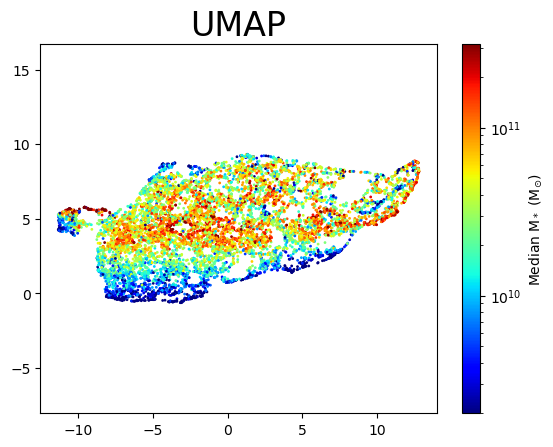

In [17]:
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=1,
    c=10**out_sample['lmass50_all'],
    cmap='jet',norm=mpl.colors.LogNorm(vmin=2*10**9,vmax=10**11.5))
plt.colorbar(label=r'Median M$_*$ (M$_{\odot}$)')
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24)

<font color='red'>
I see a pattern when using the log of the median stellar mass as the colormap. Overall, the stellar masses increase as the value of the y-axis increases. Although there are some lower stellar mass galaxies with appear at the very top of the umap.

Text(0.5, 1.0, 'UMAP')

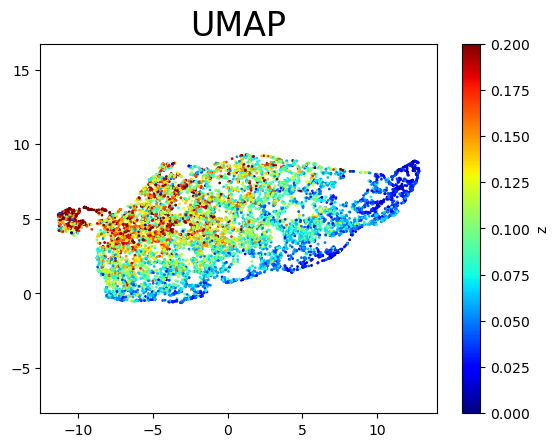

In [18]:
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=1,
    c=our_sample['redshift'],
    cmap='jet',vmin=0,vmax=0.2)
plt.colorbar(label=r'z')
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24)
#plt.plot([-7,10],[-0.5,5],color='black')

<font color='red'>
I see a pattern when using the redshift as a colormap. The southern border of the umap has lower redshift galaxies and the galaxies become more redshifted the further they are. The top left clumps are mostly made of higher redshift galaxies. In general, more redshifted galaxies are towards the top left of the map.

Text(0.5, 1.0, 'UMAP')

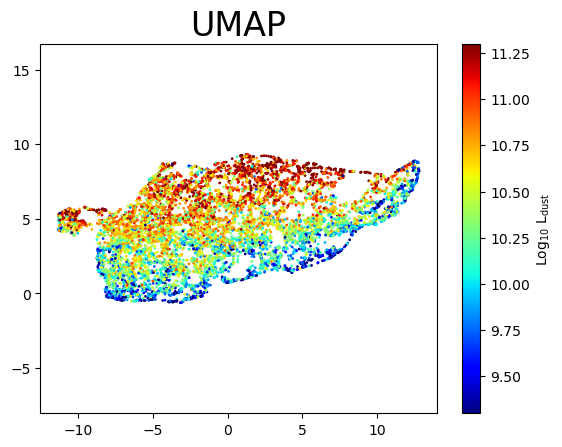

In [19]:
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=1,
    c=out_sample['ldust50_all'],
    cmap='jet',vmin=9.3,vmax=11.3)
plt.colorbar(label=r'Log$_{10}$ L$_{\rm{dust}}$')
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24)

<font color='red'>
I see a pattern when using the dust luminosity. Dust luminosities roughly increase along the y-axis. The left clumps seem to follow a similar gradient in dust luminosities as the main clump.

Text(0.5, 1.0, 'UMAP')

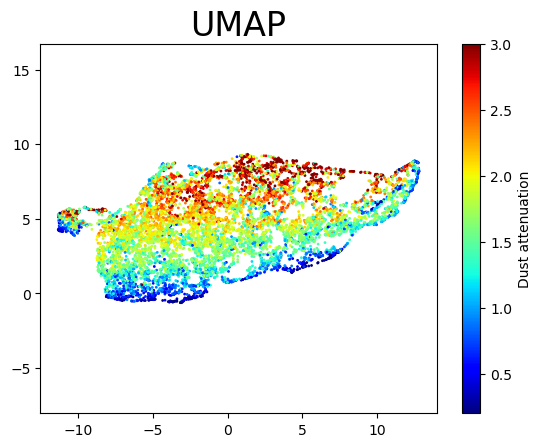

In [20]:
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=1,
    c=out_sample['tau_v50_all'],
    cmap='jet',vmin=0.2,vmax=3)
plt.colorbar(label=r'Dust attenuation')
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24)

<font color='red'>
I see a pattern when using the dust attenuation. It is very similar to dust luminosity. It roughly increases along the y-axis. The left clumps seem to follow a similar gradient in dust attenuation as the main clump.

Text(0.5, 1.0, 'UMAP')

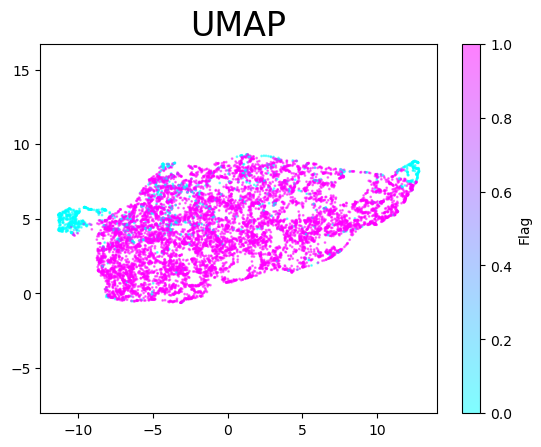

In [21]:
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=1,
    c=out_sample['flag'],alpha=0.5,
    cmap='cool')
plt.colorbar(label=r'Flag')
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24)

<font color='red'>
We can see that the left clumps are associated with galaxies where the fit did not work properly. Many of the rightmost galaxies also had fitting issues.

Text(0.5, 1.0, 'UMAP')

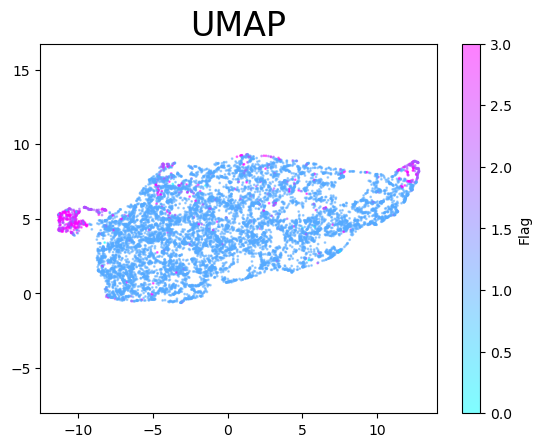

In [22]:
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=1,
    c=out_sample['flag_r'],alpha=0.5,
    cmap='cool')
plt.colorbar(label=r'Flag')
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24)


<font color='red'>
Specifically, these galaxies are associated with the flag_r for exponential radius. So the left clumps are associated with galaxies whose observations would result in a fit with an exponential radius.

#### Question 5 [bonus]

If you are feeling brave, you can try several encoding tools - how do your results change? What if you keep more than 2 principal variables? Does changing *hyperparameters* of your algorithm change your results quantitatively / qualitatively?


In [23]:
umap.UMAP?

Init signature:
umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='euclidean',
    metric_kwds=None,
    output_metric='euclidean',
    output_metric_kwds=None,
    n_epochs=None,
    learning_rate=1.0,
    init='spectral',
    min_dist=0.1,
    spread=1.0,
    low_memory=True,
    n_jobs=-1,
    set_op_mix_ratio=1.0,
    local_connectivity=1.0,
    repulsion_strength=1.0,
    negative_sample_rate=5,
    transform_queue_size=4.0,
    a=None,
    b=None,
    random_state=None,
    angular_rp_forest=False,
    target_n_neighbors=-1,
    target_metric='categorical',
    target_metric_kwds=None,
    target_weight=0.5,
    transform_seed=42,
    transform_mode='embedding',
    force_approximation_algorithm=False,
    verbose=False,
    tqdm_kwds=None,
    unique=False,
    densmap=False,
    dens_lambda=2.0,
    dens_frac=0.3,
    dens_var_shift=0.1,
    output_dens=False,
    disconnection_distance=None,
    precomputed_knn=(None, None, None),
)
Docstring:     
Uniform Manifold

<font color='red'>
I tried several hyperparameters for UMAP and they can significantly change the result. For umap, I am setting init='pca' instead of using the default init='spectral'. When using init='spectral', I got a lot of variations in my results depending on the random_state (i.e randomness). Using init='pca' gave me more consistent results. PCA is another useful dimensionality reduction technique so using the first n_components from the PCA as input should help to obtain better results.

I also played with n_neighbours. When lowering n_neighbours, I got more clustering.

In [24]:
pca = PCA(n_components=2)
pca.fit(wtf)

PCA(n_components=2)

In [25]:
result_pca = pca.transform(wtf)
#np.save('PCA_A2S1Q5',result_pca)

In [26]:
result_pca=np.load('PCA_A2S1Q5.npy',allow_pickle=True)

In [27]:
result_pca.shape

(10000, 2)

(-50.0, 300.0)

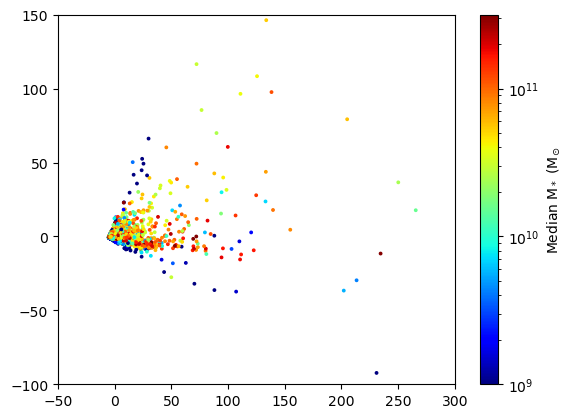

In [28]:
plt.scatter(
    result_pca[:, 0],
    result_pca[:, 1],s=3,
    c=10**out_sample['lmass50_all'],
    cmap='jet',norm=mpl.colors.LogNorm(vmin=10**9,vmax=10**11.5))
plt.colorbar(label=r'Median M$_*$ (M$_{\odot}$')
#plt.gca().set_aspect('equal', 'datalim')
plt.title('', fontsize=24)
plt.ylim(-100,150)
plt.xlim(-50,300)

Text(0.5, 1.0, 'PCA')

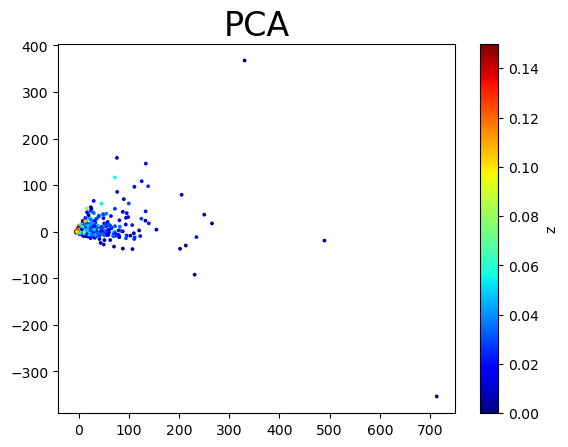

In [29]:
plt.scatter(
    result_pca[:, 0],
    result_pca[:, 1],s=3,
    c=our_sample['redshift'],
    cmap='jet',vmin=0,vmax=0.15)
plt.colorbar(label=r'z')
plt.title('PCA', fontsize=24)

Text(0.5, 1.0, 'PCA')

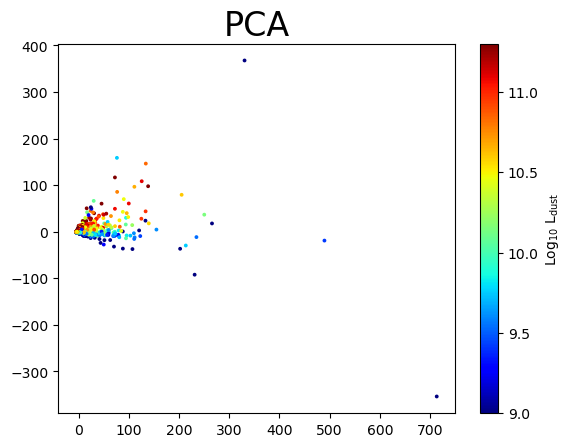

In [30]:
plt.scatter(
    result_pca[:, 0],
    result_pca[:, 1],s=3,
    c=out_sample['ldust50_all'],
    cmap='jet',vmin=9,vmax=11.3)
plt.colorbar(label=r'Log$_{10}$ L$_{\rm{dust}}$')
plt.title('PCA', fontsize=24)

<font color='red'>

I also tried using PCA to reduce the dimension of my dataset but I got better results using UMAP so I decided to use UMAP instead of PCA.

# Section 2: Unsupervised ML

In section, you will implement a clustering algorithm to see if there are any *natural* clusters in your data. You can choose any algorithm from the ones shown [on the Scikit-Learn website](https://scikit-learn.org/stable/modules/clustering.html). The best algorithm depends on your data: so refer back to the plots you made in Section 1 to see which algorithm you think will work best. 

Load in the subset you chose in the previous section. 

In [31]:
# Space for code

#### 

#### Question 1

Choose a clustering algorithm. Why did you go for this particular one?

<font color='red'>
I want to use a clustering algorithm that works well even if the clusters have peculiar shapes. As we've seen in class, this is problematic for some methods. Therefore, I will try using spectral clustering or HDBSCAN or DBSCAN since it works in these kinds of cases. I think that I will end up using HDBSCAN. DBSCAN and HDBSCAN do not require an input for the number of clusters which is great. HDBSCAN can find clusters of varying densities, which DBSCAN cannot. So HDBSCAN might be a better choice since I do not know if my clusters will have the same density.

#### Question 2

Run clustering on your **compressed data**. Think of these questions, if they are relevant to your algorithm - often the *hyperparameters* of your algorithm will need you to answer these.

* How many clusters should you fit to your data?
* Where should the initial guesses for the cluster centers be?
* What should be the typical size for each cluster?


<font color='red'>
My answers for questions 2-3 are mixed together.

In [32]:
# Placeholder
hdb = sklearn.cluster.HDBSCAN(min_cluster_size=int(0.01*len(result_comp)))
hdb.fit(result_comp)


HDBSCAN(min_cluster_size=100)

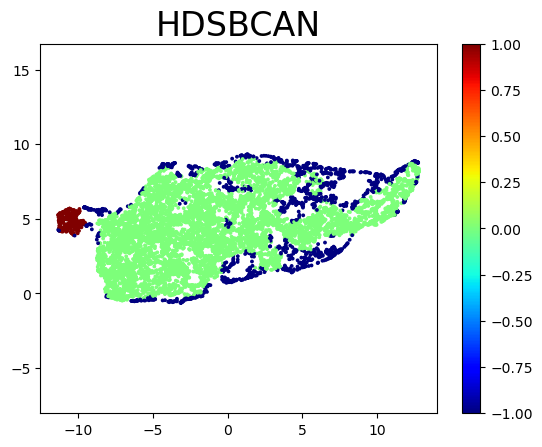

In [33]:
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=hdb.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('HDSBCAN', fontsize=24)
plt.colorbar()

In [34]:
hdb.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
cond0=hdb.labels_==0
cond1=hdb.labels_==1
cond2=hdb.labels_==-1

n0=len(hdb.labels_[cond0])
n1=len(hdb.labels_[cond1])
n2=len(hdb.labels_[cond2])

n0,n1,n2,n0/n2

(8086, 337, 1577, 5.127457197209893)

In [36]:
sc = sklearn.cluster.SpectralClustering(3,assign_labels='discretize').fit(result_comp)

Text(0.5, 1.0, 'Spectral Clustering n=3')

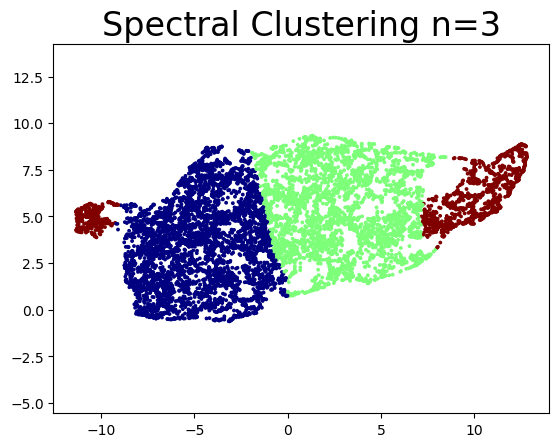

In [37]:
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=sc.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Spectral Clustering n=3', fontsize=24)

Text(0.5, 1.0, 'Spectral Clustering n=2')

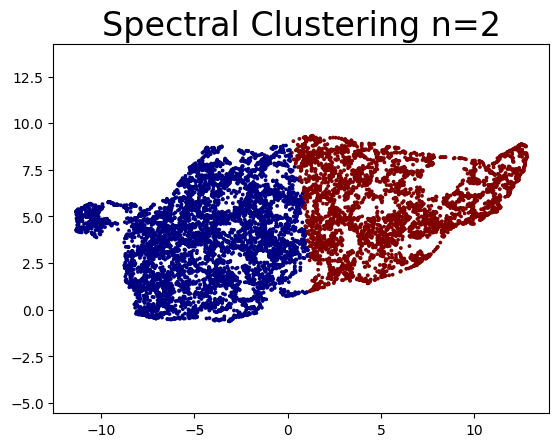

In [38]:
sc2 = sklearn.cluster.SpectralClustering(2,assign_labels='discretize').fit(result_comp)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=sc2.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Spectral Clustering n=2', fontsize=24)

Text(0.5, 1.0, 'Spectral Clustering n=3')

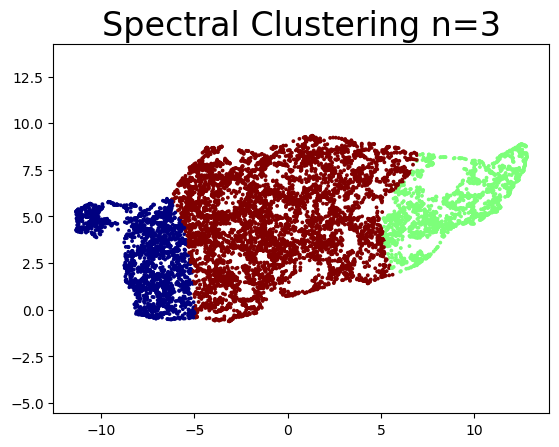

In [39]:
sc3 = sklearn.cluster.SpectralClustering(3,assign_labels='cluster_qr').fit(result_comp)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=sc3.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Spectral Clustering n=3', fontsize=24)

Text(0.5, 1.0, 'Spectral Clustering n=4')

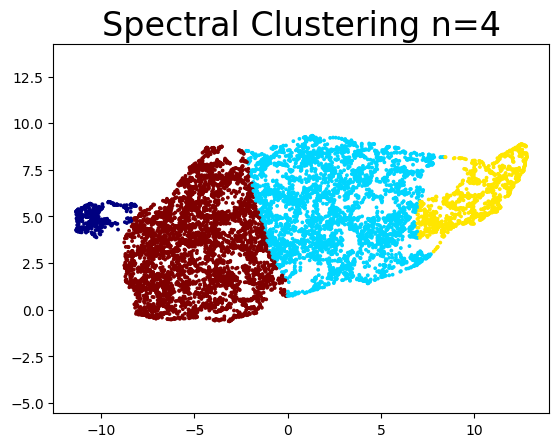

In [40]:
sc4 = sklearn.cluster.SpectralClustering(4,assign_labels='discretize').fit(result_comp)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=sc4.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Spectral Clustering n=4', fontsize=24)

Text(0.5, 1.0, 'DBSCAN')

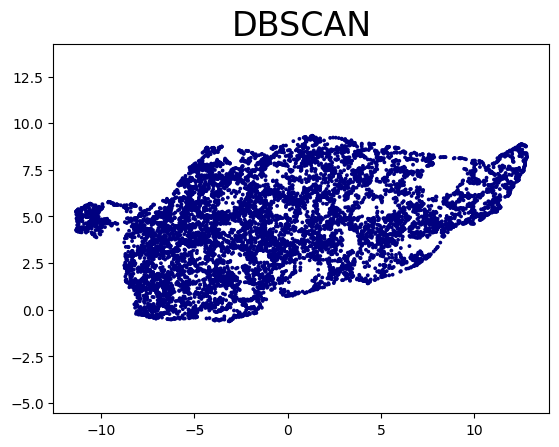

In [41]:
dbscan_clustering = sklearn.cluster.DBSCAN(eps=2, min_samples=5).fit(result_comp)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=dbscan_clustering.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN', fontsize=24)

#### Question 3

Plot your compressed data, coloring the points by which cluster they belong it.
Optionally, you can also overplot the boundaries of your cluster (see the example [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#visualize-the-results-on-pca-reduced-data)).

* Do the clusters make sense?
* Do you think you chose the right number of clusters?

You can use this visualization to tune the hyper-parameters of your clustering algorithm to perhaps get a cleaner result.

<font color='red'>

I expect only 2 clusters to be fitted to my data. At most, I'm thinking that we might see three clusters with two clusters on the left and the main cluster. However, I think that most likely I will have 2 clusters, the main one and the one on the left (which includes the tiny left clump too).

I tried HDBSCAN and DBSCAN which do not require me to choose the number of clusters. It identified only 1 cluster using DBSCAM. For HDBSCAN, I chose a minimum cluster size of 1% of the total number of points since I didn't want clusters of less than 100 galaxies. HDBSCAN gives me 3 clusters. The left clump is one cluster, which I expected, and the main cluster is separated in 2 clusters, which I did not expect.

For Spectral Clustering, I decided to not use k-means for assign_labels since I think that k-means might not find good centroids based on the shape of my data. I tried different number of clusters to see what results I get.  I got different results for Spectral clustering with 3 clusters, whether I used cluster_qr or discretize. I find that the result using discretize is better since it does not associate the left clump with the left part of the main cluster. When doing spectral clustering with n=2, I am surprised that it simply separated the data into two similar sized clumps instead of separating the left clump from the main cluster.

I will focus on HDBSCAN as the algorithm that I have chosen. With the current choices for this algorithm, I get the small left clump, which I expected, and I get that the main clump is separated into two clusters: one of which is five times bigger than the other.

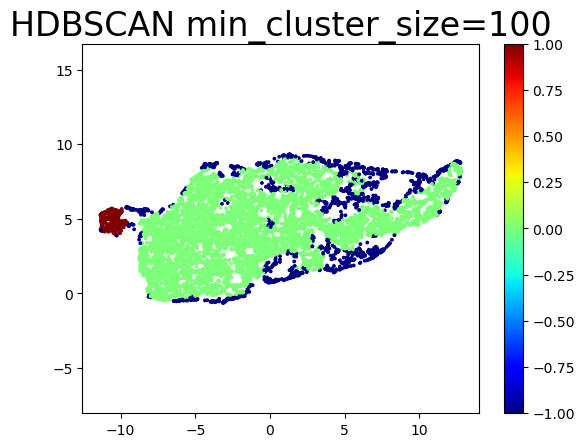

In [42]:
hdb001 = sklearn.cluster.HDBSCAN(min_cluster_size=int(0.01*len(result_comp)))
hdb001.fit(result_comp)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=hdb001.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN min_cluster_size=100', fontsize=24)
plt.colorbar()

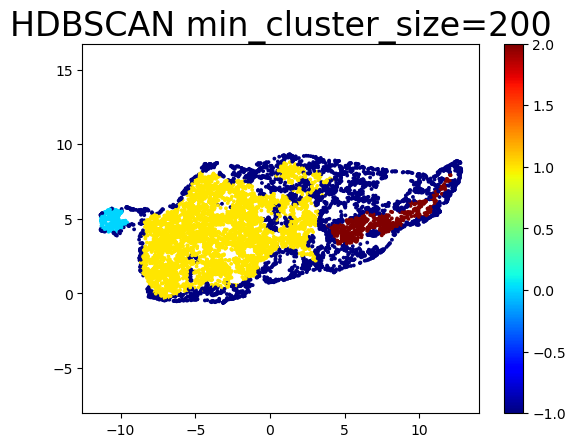

In [43]:
hdb002 = sklearn.cluster.HDBSCAN(min_cluster_size=int(0.02*len(result_comp)))
hdb002.fit(result_comp)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=hdb002.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN min_cluster_size=200', fontsize=24)
plt.colorbar()

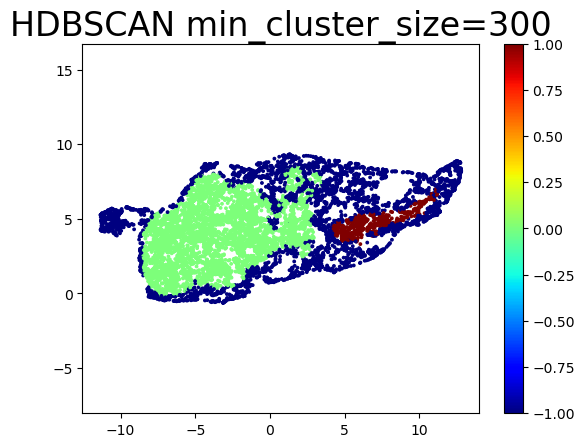

In [44]:
hdb300 = sklearn.cluster.HDBSCAN(min_cluster_size=int(300))
hdb300.fit(result_comp)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=hdb300.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN min_cluster_size=300', fontsize=24)
plt.colorbar()

<font color='red'>

Depending on the minimum cluster size which I use, I get different clusters, and different number of clusters when using DBSCAN. Since the left clump becomes connected to galaxies in the main cluster once I put a minimum cluster size of 300 galaxies and that I do not want that, I need to chose a lower value for the minimum cluster size. Overall, using min_cluster_size=200 appears to roughly separate the bigger cluster of min_cluster_size=100 into two different clusters. Having the left clump/clumps be his own cluster makes sense since we know that it contains mostly galaxies where the fit will ultimately not work. 

(array([0.00521512, 0.00260756, 0.01825293, 0.0208605 , 0.03911343,
        0.17731421, 0.45632334, 0.77444589, 0.48500652, 0.0208605 ]),
 array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ]),
 <BarContainer object of 10 artists>)

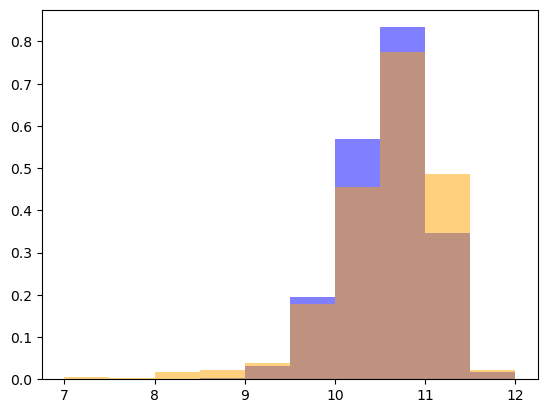

In [45]:
label200=hdb002.labels_
cond200_1=label200==1
cond200_2=label200==2
#cond200_n1=label200==-1
var_check=out_sample['lmass50_all']
plt.hist(var_check[cond200_1],color='blue',alpha=0.5,density=True,range=(7,12))
plt.hist(var_check[cond200_2],color='orange',alpha=0.5,density=True,range=(7,12))
#plt.hist(var_check[cond200_n1],color='red',alpha=0.5,density=True,range=(7,12))

(array([ 5.51933942, 11.82094741, 11.38635376,  4.04172099,  0.43459365,
         0.1303781 ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ]),
 <BarContainer object of 10 artists>)

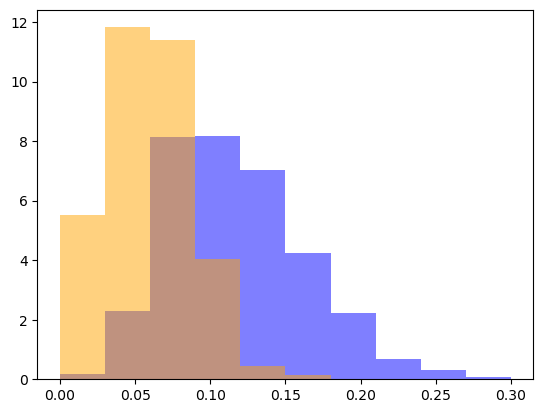

In [46]:
label200=hdb002.labels_
cond200_1=label200==1
cond200_2=label200==2
var_check=our_sample['redshift']
plt.hist(var_check[cond200_1],color='blue',alpha=0.5,density=True,range=(0,0.3))
plt.hist(var_check[cond200_2],color='orange',alpha=0.5,density=True,range=(0,0.3))

#### Question 4

Look at the distribution of *physical properties* (mass, redshift, dust...) from the output catalog for each one of your clusters. Are there any statistically significant differences between the clusters in any of these properties?

In [47]:
out_sample.columns
from scipy.stats import ks_2samp

In [48]:
# Taking a p-value 
def get_same(vm1,v0,v1,v2):
    if(ks_2samp(vm1,v0)[1]<0.05):
        print('Dark blue and cyan are distinct',(ks_2samp(vm1,v0)[1]))
    if(ks_2samp(vm1,v1)[1]<0.05):
        print('Dark blue and yellow are distinct',(ks_2samp(vm1,v1)[1]))
    if(ks_2samp(vm1,v2)[1]<0.05):
        print('Dark blue and dark red are distinct',(ks_2samp(vm1,v2)[1]))
    if(ks_2samp(v0,v1)[1]<0.05):
        print('Cyan and yellow are distinct',(ks_2samp(v0,v1)[1]))
    if(ks_2samp(v0,v2)[1]<0.05):
        print('Cyan and dark red are distinct',(ks_2samp(v0,v2)[1]))
    if(ks_2samp(v1,v2)[1]<0.05):
        print('Yellow and dark red are distinct',(ks_2samp(v1,v2)[1]))

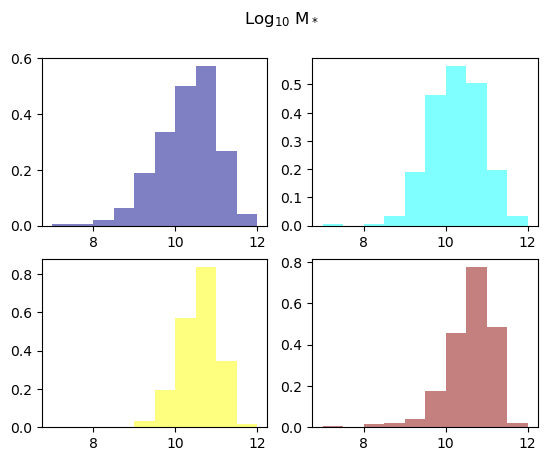

Dark blue and cyan are distinct 0.04030170354024575
Dark blue and yellow are distinct 7.345099371408957e-73
Dark blue and dark red are distinct 4.5220167874319516e-27
Cyan and yellow are distinct 1.8401134810420583e-16
Cyan and dark red are distinct 1.139111906798133e-15
Yellow and dark red are distinct 3.47034427646526e-05


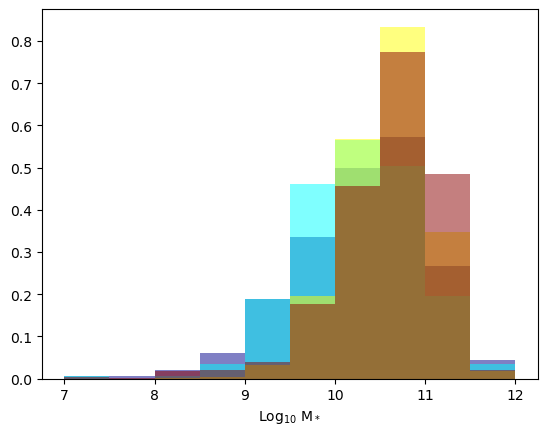

In [49]:
label200=hdb002.labels_
cond200_1=label200==1
cond200_2=label200==2
cond200_0=label200==0
cond200_m1=label200==-1
#cond200_n1=label200==-1
var_check=out_sample['lmass50_all']

titles=['z',r'Log$_{10}$ M$_*$',r'Log$_{10}$ SFR',r'Log$_{10}$ sSFR',r'Log$_{10}$ L$_{\rm{dust}}$',r'$\tau_v$']

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
plt.suptitle(titles[1])
ax1.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(7,12))
ax2.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(7,12))
ax3.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(7,12))
ax4.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(7,12))
plt.show()

plt.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(7,12))
plt.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(7,12))
plt.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(7,12))
plt.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(7,12))
plt.xlabel(titles[1])

get_same(var_check[cond200_m1],var_check[cond200_0],var_check[cond200_1],var_check[cond200_2])

<font color='red'>

There aren't significant differences between clusters for stellar mass. The dark blue points in the UMAP have a higher proportion of lower stellar mass galaxies than the yellow or dark red galaxies.

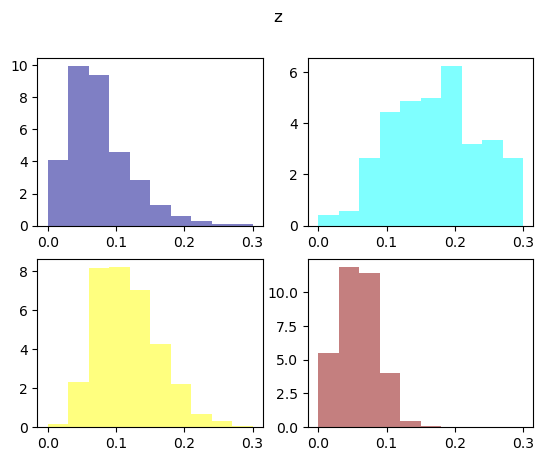

Dark blue and cyan are distinct 6.696314493206685e-105
Dark blue and yellow are distinct 6.497661282925534e-300
Dark blue and dark red are distinct 9.28779107063229e-18
Cyan and yellow are distinct 1.0263102342175204e-54
Cyan and dark red are distinct 9.918814668097255e-140
Yellow and dark red are distinct 1.2256727784145458e-200


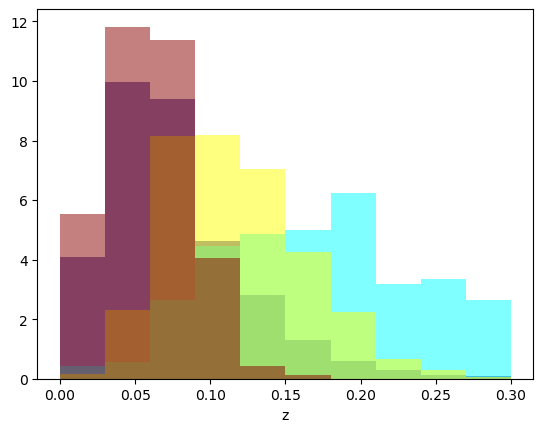

In [50]:
var_check=our_sample['redshift']

range1,range2=0,0.3
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(range1,range2))
ax2.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(range1,range2))
ax3.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(range1,range2))
ax4.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(range1,range2))
plt.suptitle(titles[0])
plt.show()

plt.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(range1,range2))
plt.xlabel(titles[0])
get_same(var_check[cond200_m1],var_check[cond200_0],var_check[cond200_1],var_check[cond200_2])

<font color='red'>
We do see differences in redshift for the different clusters.
The cyan cluster contains the galaxies with the largest redshifts. Since we know that the cyan cluster is associated with galaxies where there are issues with the fit, it is not surprising that it contains the galaxies which are the furthest as it makes observations more difficult (less flux received). The dark red cluster has a lot of low redshift galaxies and lacks high redshift ones.

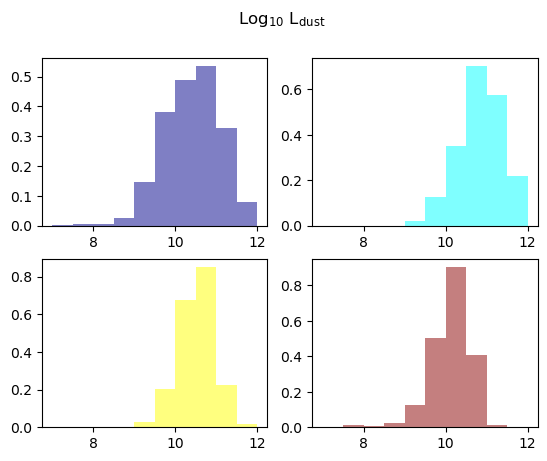

Dark blue and cyan are distinct 1.1690965378304042e-19
Dark blue and yellow are distinct 3.848940943253831e-54
Dark blue and dark red are distinct 5.944027054000083e-50
Cyan and yellow are distinct 9.189594677037688e-22
Cyan and dark red are distinct 1.0576099022340651e-63
Yellow and dark red are distinct 3.485211814809356e-71


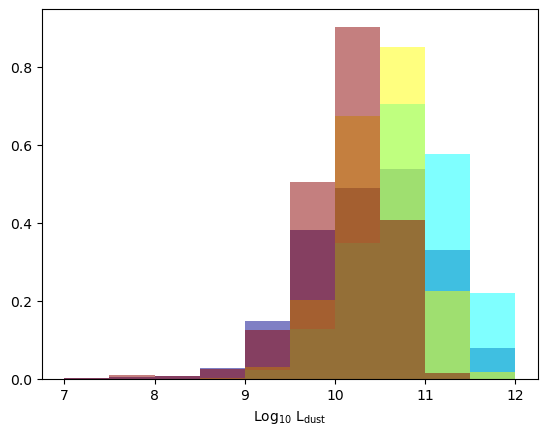

In [51]:
var_check=out_sample['ldust50_all']
range1,range2=7,12
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(range1,range2))
ax2.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(range1,range2))
ax3.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(range1,range2))
ax4.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(range1,range2))
plt.suptitle(titles[4])
plt.show()

plt.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(range1,range2))
plt.xlabel(titles[4])
get_same(var_check[cond200_m1],var_check[cond200_0],var_check[cond200_1],var_check[cond200_2])

<font color='red'>

There is not a significant difference in the distributions of dust luminosities for the different clusters. Galaxies in the cyan cluster seems to have higher dust luminosity than other galaxies.

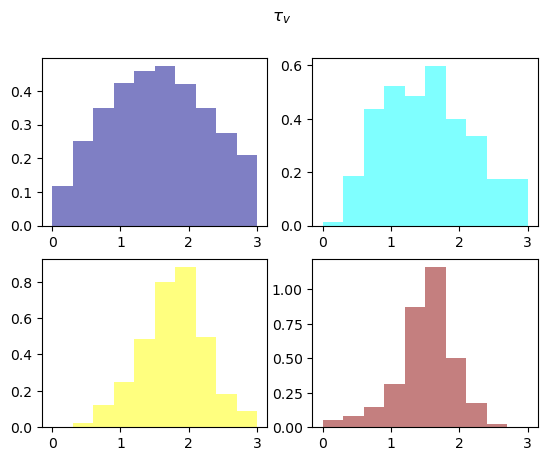

Dark blue and yellow are distinct 1.872491872244077e-81
Dark blue and dark red are distinct 6.414543450923648e-35
Cyan and yellow are distinct 2.1108011125771836e-12
Cyan and dark red are distinct 9.542458013581572e-09
Yellow and dark red are distinct 6.339882934498729e-55


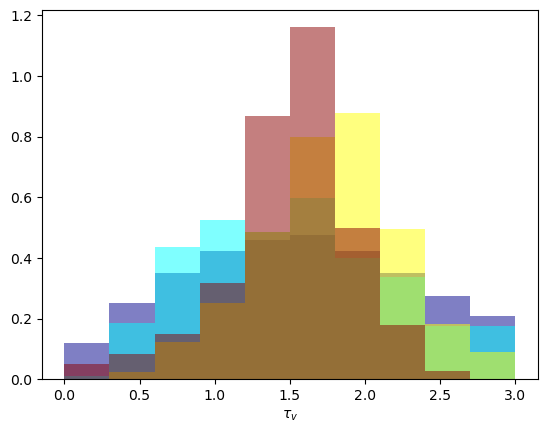

In [52]:
var_check=out_sample['tau_v50_all']
range1,range2=0,3
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(range1,range2))
ax2.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(range1,range2))
ax3.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(range1,range2))
ax4.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(range1,range2))
plt.suptitle(titles[5])
plt.show()

plt.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(range1,range2))
plt.xlabel(titles[5])
get_same(var_check[cond200_m1],var_check[cond200_0],var_check[cond200_1],var_check[cond200_2])

<font color='red'>

The dark red and yellow distributions are narrower than the cyan and dark blue distributions. Other than that, there are not very significant differences.

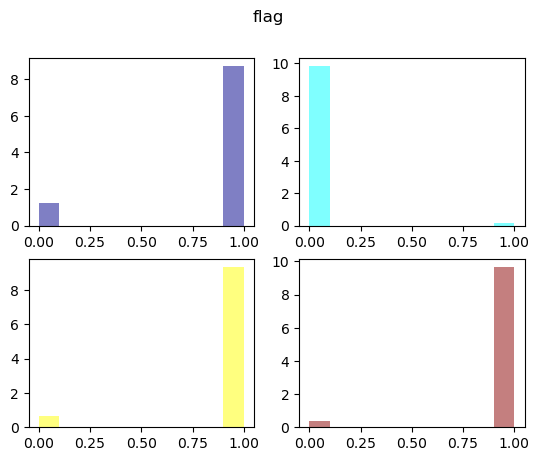

Text(0.5, 0, 'flag')

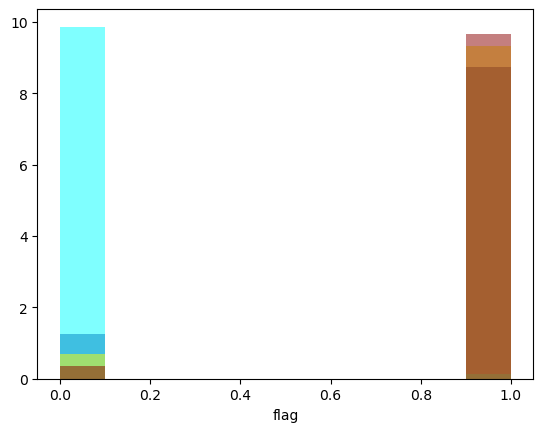

In [53]:
var_check=out_sample['flag']
range1,range2=0,1
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(range1,range2))
ax2.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(range1,range2))
ax3.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(range1,range2))
ax4.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(range1,range2))
plt.suptitle('flag')
plt.show()

plt.hist(var_check[cond200_m1],color='darkblue',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_0],color='cyan',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_1],color='yellow',alpha=0.5,density=True,range=(range1,range2))
plt.hist(var_check[cond200_2],color='darkred',alpha=0.5,density=True,range=(range1,range2))
plt.xlabel('flag')

<font color='red'>

This distribution clearly shows that most galaxies where fitting failed (with flag=0) are in the cyan cluster.

<font color='red'>

Using the two-sample Kolmogorov-Smirnov test for goodness of fit to determine whether two distributions are consistent with having been sampled from the same distribution. We get, for stellar mass, redshift, dust attenuation and dust luminosity, that the clusters are statistically different, with the distribution of properties for different clusters being inconsistent with having been sampled from a same distribution. However, looking at the histograms, the properties distributions for the different clusters are not extremely different. The main differences are that the cyan cluster contains galaxies higher redshift galaxies and that almost all galaxies in the cyan cluster have flag=0 which means that there may be issues with the fit done by Chang et al. (2015).

#### Question 5

Repeat **questions 2 and 4** but using your full dataset instead of the compressed one. 
* Do you see any differences in your results?
* Did you need to choose different hyperparameters?


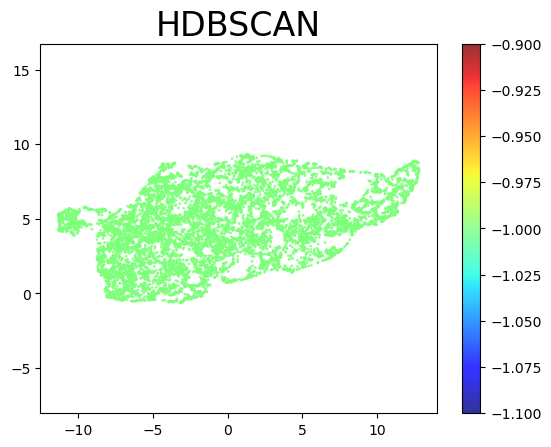

In [54]:
# Placeholder
all0=np.array([our_sample['flux_u'],our_sample['flux_g'],our_sample['flux_r'],our_sample['flux_i'],our_sample['flux_z'],our_sample['flux_w1'],our_sample['flux_w2'],our_sample['flux_w3'],our_sample['flux_w4']])
norm_all0=sklearn.preprocessing.RobustScaler().fit_transform(all0.T)
hdball = sklearn.cluster.HDBSCAN(min_cluster_size=100)
hdball.fit(norm_all0)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=1,alpha=0.8,
    c=hdball.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN', fontsize=24)
plt.colorbar()

<font color='red'> I cannot get HDBSCAN to give me more than 1 cluster unless I go to extremely small values of galaxies allowed per clusters (like only 25). The clusters obtained when using small min_cluster_size are not very good at comparing properties.

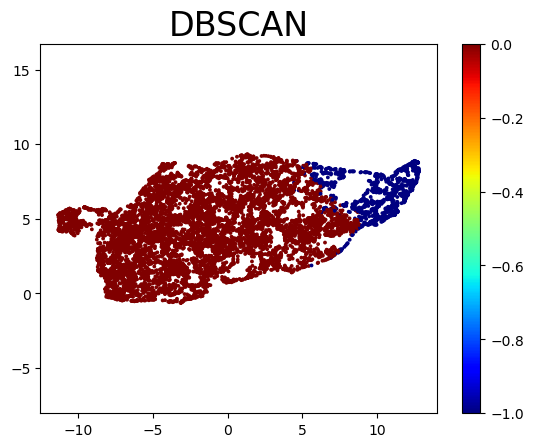

In [55]:
dbscan_clustering = sklearn.cluster.DBSCAN(eps=2, min_samples=100).fit(norm_all0)
plt.scatter(
    result_comp[:, 0],
    result_comp[:, 1],s=3,
    c=dbscan_clustering.labels_,
    cmap='jet')
plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN', fontsize=24)
plt.colorbar()

Text(0.5, 0, '$\\tau_v$')

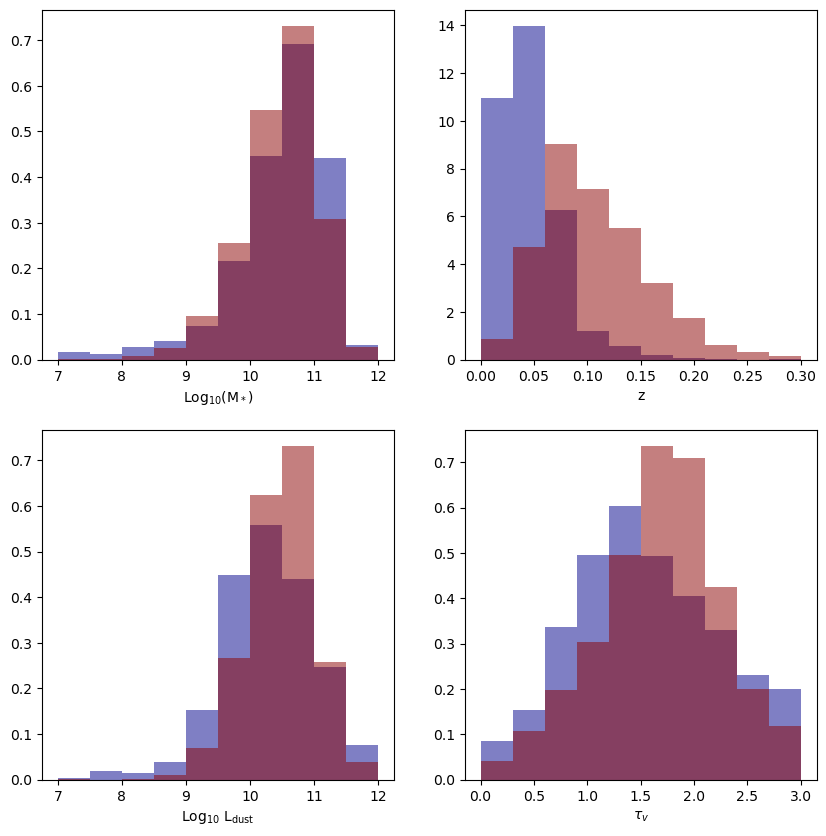

In [56]:
label_dbs=dbscan_clustering.labels_
cond_dbs_0=label_dbs==0
cond_dbs_m1=label_dbs==-1
titles=['z',r'Log$_{10}$ M$_*$',r'Log$_{10}$ SFR',r'Log$_{10}$ sSFR',r'Log$_{10}$ L$_{\rm{dust}}$',r'$\tau_v$']
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=((10,10)))
ax1.hist(out_sample['lmass50_all'][cond_dbs_m1],color='darkblue',alpha=0.5,density=True,range=(7,12))
ax1.hist(out_sample['lmass50_all'][cond_dbs_0],color='darkred',alpha=0.5,density=True,range=(7,12))
ax1.set_xlabel(r'Log$_{10}$(M$_*$)')
ax2.set_xlabel(r'z')
ax3.set_xlabel(titles[4])
ax2.hist(our_sample['redshift'][cond_dbs_m1],color='darkblue',alpha=0.5,density=True,range=(0,0.3))
ax2.hist(our_sample['redshift'][cond_dbs_0],color='darkred',alpha=0.5,density=True,range=(0,0.3))
ax3.hist(out_sample['ldust50_all'][cond_dbs_m1],color='darkblue',alpha=0.5,density=True,range=(7,12))
ax3.hist(out_sample['ldust50_all'][cond_dbs_0],color='darkred',alpha=0.5,density=True,range=(7,12))

ax4.hist(out_sample['tau_v50_all'][cond_dbs_m1],color='darkblue',alpha=0.5,density=True,range=(0,3))
ax4.hist(out_sample['tau_v50_all'][cond_dbs_0],color='darkred',alpha=0.5,density=True,range=(0,3))
ax4.set_xlabel(titles[5])

<font color='red'>
DBSCAN can obtain two clusters but it doesn't separate the left clumps (mostly flag=0) from the main clump (mostly flag=1). Even when changing min_samples, I did not manage to properly separate the left clumps from the rest of the data. The two clusters identified kind of separate the high and low redshifts, although there is a significant amount of overlap.

<font color='red'>

My results are significantly different. A method which used to work well earlier (HDBSCAN) is no longer capable of identifying multiple clusters. With the full dataset, I cannot get the spectral clustering method to finish running and give me an output. There is too much data for the method to work in a timely manner. While I obtain two clusters using DBSCAN, the result is not nearly as good as when using the compressed data, although one cluster tends to have galaxies with higher redshifts than the other. However, it cannot separate the left clumps (where flag=0) from the main cluster (where flag=1). This was a great feature from the previous analysis. Even when changing the hyperparameters for the different methods, analyzing the full dataset did not work as well as using the compressed data. 

# Section 3: Supervised ML

Finally, we can use *supervised ML* to train an algorithm that predicts our relevant physical parameters (mass, redshift, etc.) from the input data directly. This is a regression task, since we want to predict a continuous variable.

You should aim to **predict mass and redshift** of galaxies, but you can also try to predict more properties available in the output catalog.

#### Question 1

Choose a regression tool (e.g., a linear model, SVM, neural network, gaussian process, decision tree... see [more examples here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)).

Why did you choose this particular one? 

* You can either train N different models for mass, redshift, etc.; or you can train a single model that predicts N parameters simultaneously.
* Think: how many variables do you want to predict, what does your data look like, what relationship do you see by eye between your input and output data...



<font color='red'>

I chose to use sklearn.neural_network.MLPRegressor. It is a Multi-Layer Perceptron (MLP) regressor neural network model. I chose this model because it is an easy to implement model that can deal with fairly complex data. It can learn non-linear functions which can be useful since you do not have to restrict yourself to linear functions. I chose a regressor since I want to predict continuous properties and not simply classify the data. Also, I chose it because it only requires one model to predict many parameters simultaneously. 

In [57]:
from sklearn.neural_network import MLPClassifier

In [58]:
out_sample.columns

Index(['id', 'lmass2_5_all', 'lmass16_all', 'lmass50_all', 'lmass84_all',
       'lmass97_5_all', 'lsfr2_5_all', 'lsfr16_all', 'lsfr50_all',
       'lsfr84_all', 'lsfr97_5_all', 'lssfr2_5_all', 'lssfr16_all',
       'lssfr50_all', 'lssfr84_all', 'lssfr97_5_all', 'ldust2_5_all',
       'ldust16_all', 'ldust50_all', 'ldust84_all', 'ldust97_5_all',
       'mu2_5_all', 'mu16_all', 'mu50_all', 'mu84_all', 'mu97_5_all',
       'tau_v2_5_all', 'tau_v16_all', 'tau_v50_all', 'tau_v84_all',
       'tau_v97_5_all', 'vmax', 'lrest_u', 'lrest_g', 'lrest_r', 'lrest_i',
       'lrest_z', 'lrest_w1', 'lrest_w2', 'lrest_w3', 'lrest_w4', 'flag_r',
       'flag_w', 'flag_w1', 'flag_w2', 'flag_w3', 'flag_w4', 'flag_chi2',
       'flag'],
      dtype='object')

In [59]:
input0=np.array([our_sample['flux_u'],our_sample['flux_g'],our_sample['flux_r'],our_sample['flux_i'],our_sample['flux_z'],our_sample['flux_w1'],our_sample['flux_w2'],our_sample['flux_w3'],our_sample['flux_w4']])
#,our_sample['extin_u'],our_sample['extin_g'],our_sample['extin_r'],our_sample['extin_i'],our_sample['extin_z']])

In [60]:
output0=np.array([our_sample['redshift'],out_sample['lmass50_all'],out_sample['lsfr50_all'],
                 out_sample['lssfr50_all'],out_sample['ldust50_all'],out_sample['tau_v50_all']])

In [61]:
cond=out_sample['flag']==1
input0=(input0.T[cond]).T
output0=(output0.T[cond]).T

#### Question 2

Split your data into two sub-samples: one for training and one for validation

Use the tool you chose to predict the physical parameters from the input *training* data.

* Optimize the parameters of the model
* What is the correlation between predicted mass/redshift/other parameters, or the errors in the predictions?


#### Question 3

Use your model to predict the physical parameters of your validation sample

* What is the accuracy? Is the model performing as well as you expected?

In [62]:
# Placeholder
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [63]:

scaler_input=sklearn.preprocessing.RobustScaler()
scaler_input.fit(input0.T)
norm_input=scaler_input.transform(input0.T)
scaler_output=sklearn.preprocessing.RobustScaler()
scaler_output.fit(output0.T)
norm_output=scaler_output.transform(output0.T)

X_train, X_test, y_train, y_test = train_test_split(norm_input, norm_output,random_state=69)
#cond=y_train[:,-1]==1
#X_train=X_train[cond]
#y_train=y_train[cond]

In [64]:
X_train.shape,y_train.shape,X_test.shape

((6651, 9), (6651, 6), (2217, 9))

In [65]:
regr = MLPRegressor(random_state=69, max_iter=1000,hidden_layer_sizes=(100,100,100,100)).fit(X_train, y_train)

In [66]:
prediction=regr.predict(X_test)

In [67]:
out_predict=scaler_output.inverse_transform(prediction)
out_real=scaler_output.inverse_transform(y_test)

In [68]:
prediction.shape

(2217, 6)

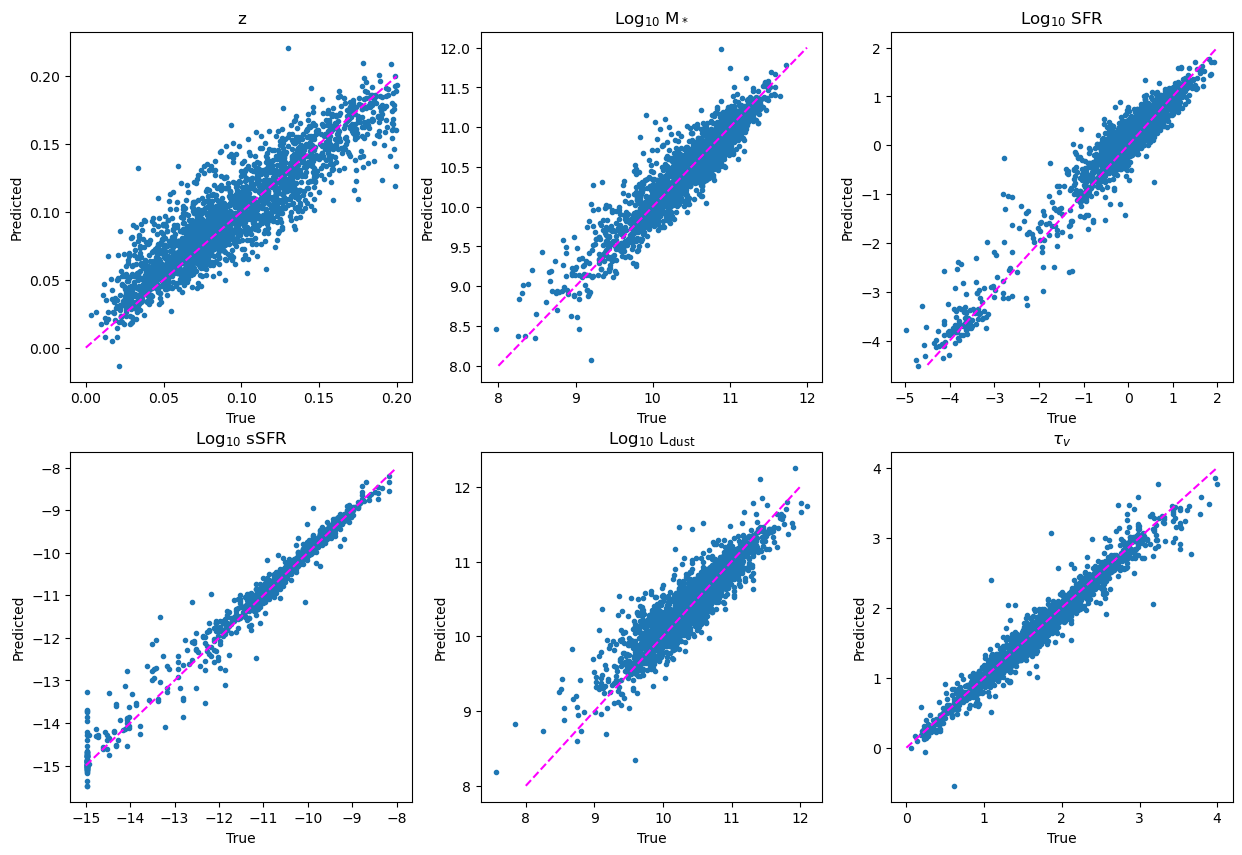

In [69]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=((15,10)))
ax1.errorbar(out_real.T[0],out_predict.T[0],fmt='.')
ax2.errorbar(out_real.T[1],out_predict.T[1],fmt='.')
ax3.errorbar(out_real.T[2],out_predict.T[2],fmt='.')
ax4.errorbar(out_real.T[3],out_predict.T[3],fmt='.')
ax5.errorbar(out_real.T[4],out_predict.T[4],fmt='.')
ax6.errorbar(out_real.T[5],out_predict.T[5],fmt='.')
ax1.errorbar([0,0.2],[0,0.2],linestyle='dashed',color='magenta')
ax2.errorbar([8,12],[8,12],linestyle='dashed',color='magenta')
ax3.errorbar([-4.5,2],[-4.5,2],linestyle='dashed',color='magenta')
ax4.errorbar([-15,-8],[-15,-8],linestyle='dashed',color='magenta')
ax5.errorbar([8,12],[8,12],linestyle='dashed',color='magenta')
ax6.errorbar([0,4],[0,4],linestyle='dashed',color='magenta')
axs=[ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(6):
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('True')
    axs[i].set_ylabel('Predicted')

In [70]:
for i in range(len(titles)):
    r,p=scipy.stats.pearsonr(out_real.T[i],out_predict.T[i])
    print('{}: r= {:.2f}, p={:.2e}'.format(titles[i],r,p))

z: r= 0.90, p=0.00e+00
Log$_{10}$ M$_*$: r= 0.93, p=0.00e+00
Log$_{10}$ SFR: r= 0.96, p=0.00e+00
Log$_{10}$ sSFR: r= 0.99, p=0.00e+00
Log$_{10}$ L$_{\rm{dust}}$: r= 0.90, p=0.00e+00
$\tau_v$: r= 0.98, p=0.00e+00


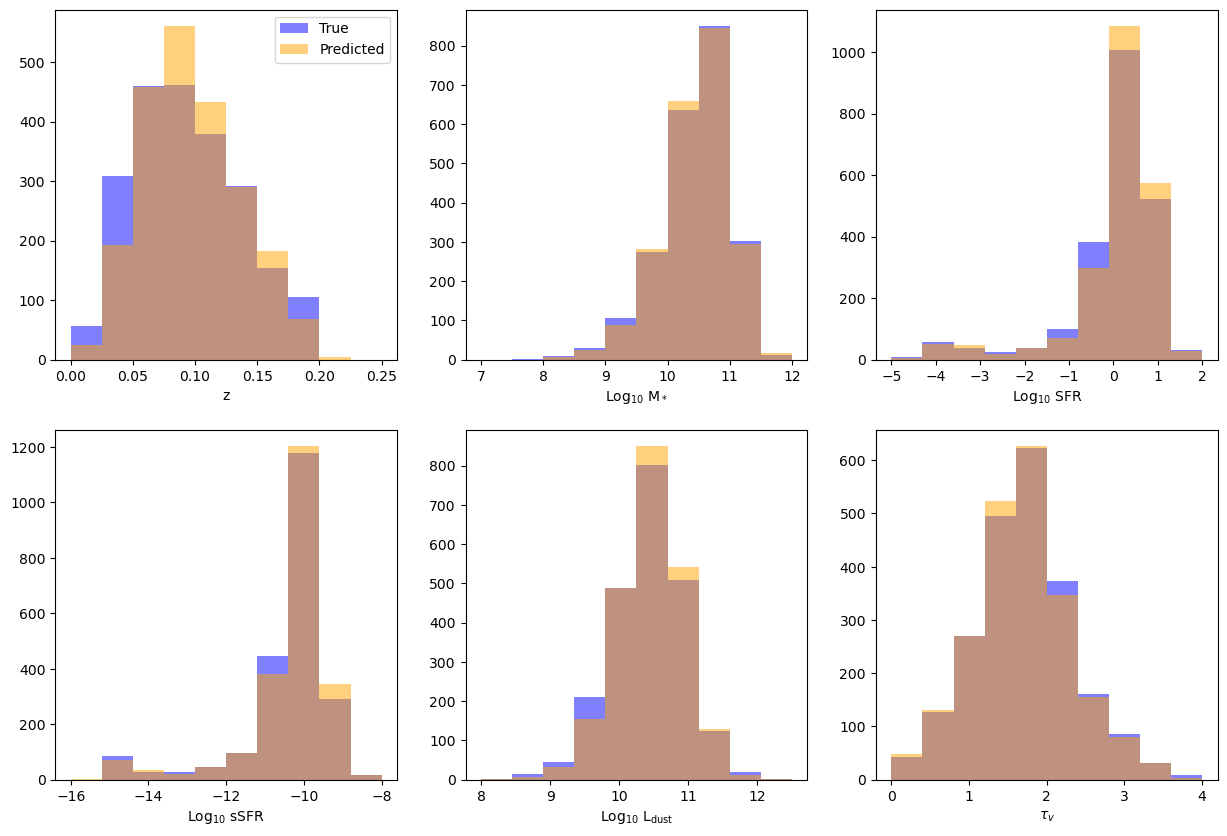

In [71]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=((15,10)))
ax1.hist(out_real.T[0],alpha=0.5,range=(0,0.25),color='blue',label='True')
ax1.hist(out_predict.T[0],alpha=0.5,range=(0,0.25),color='orange',label='Predicted')
ax1.legend()
ax2.hist(out_real.T[1],alpha=0.5,range=(7,12),color='blue')
ax2.hist(out_predict.T[1],alpha=0.5,range=(7,12),color='orange')
ax3.hist(out_real.T[2],alpha=0.5,range=(-5,2),color='blue')
ax3.hist(out_predict.T[2],alpha=0.5,range=(-5,2),color='orange')
ax4.hist(out_real.T[3],alpha=0.5,range=(-16,-8),color='blue')
ax4.hist(out_predict.T[3],alpha=0.5,range=(-16,-8),color='orange')
ax5.hist(out_real.T[4],alpha=0.5,range=(8,12.5),color='blue')
ax5.hist(out_predict.T[4],alpha=0.5,range=(8,12.5),color='orange')
ax6.hist(out_real.T[5],alpha=0.5,range=(0,4),color='blue')
ax6.hist(out_predict.T[5],alpha=0.5,range=(0,4),color='orange')
axs=[ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(6):
    axs[i].set_xlabel(titles[i])

In [72]:
# Get score

regr.score(X_test,y_test)

0.8855535957771514

<font color='red'>

I can predict the properties of my test sample very well. I get a coefficient of determination of the prediction of 0.89 which is good since the optimal value is 1. The histograms show that the distributions of predicted properties are similar to the distributions of "true" properties. The scatter plots also show that my code is correctly predicting redshift, stellar mass, SFR, specific SFR, dust luminosity and dust attenuation. 

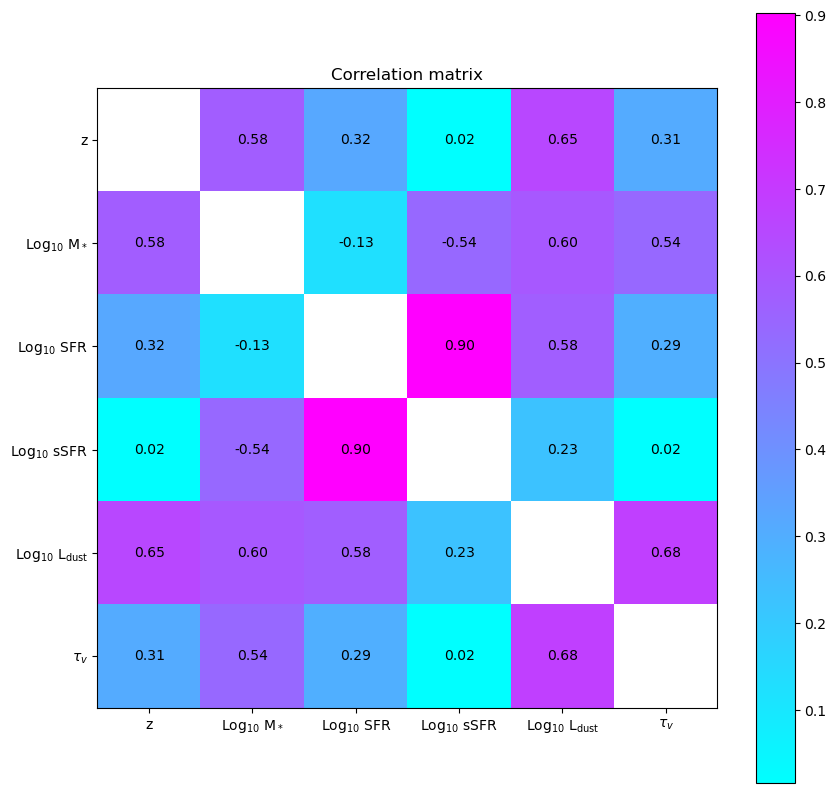

In [73]:
corr_matrix=np.corrcoef(out_predict.T)
fig=plt.subplots(1,1,figsize=(10,10))
cond=corr_matrix>=0.999999
corr_matrix[cond]=np.nan
im = plt.imshow(abs(corr_matrix),cmap='cool')
plt.colorbar()
plt.title('Correlation matrix')
plt.xticks(np.arange(len(corr_matrix)), labels=titles)
plt.yticks(np.arange(len(corr_matrix)), labels=titles)
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if(np.isfinite(corr_matrix[i,j])):
            text = plt.text(j, i, '{:.2f}'.format(corr_matrix[i, j]),
                       ha="center", va="center", color="black")

In [74]:
# Get p-value from the correlation matrix result
def get_pvalue(r):
    n=len(out_real.T[0])
    dist = scipy.stats.beta(n/2 - 1, n/2 - 1, loc=-1, scale=2)
    p = 2*dist.cdf(-abs(r))
    return p

In [75]:
nn_pvalue=np.zeros((len(out_real.T),len(out_real.T)))
for i in range(len(out_real.T)):
    for j in range(i+1,len(out_real.T)):
        nn_pvalue[i,j]=get_pvalue(corr_matrix[i,j])
        print(titles[i],' vs ',titles[j],'{:.2e}'.format(nn_pvalue[i,j]))

z  vs  Log$_{10}$ M$_*$ 3.19e-197
z  vs  Log$_{10}$ SFR 2.96e-53
z  vs  Log$_{10}$ sSFR 4.44e-01
z  vs  Log$_{10}$ L$_{\rm{dust}}$ 2.35e-270
z  vs  $\tau_v$ 1.05e-49
Log$_{10}$ M$_*$  vs  Log$_{10}$ SFR 2.15e-09
Log$_{10}$ M$_*$  vs  Log$_{10}$ sSFR 6.66e-168
Log$_{10}$ M$_*$  vs  Log$_{10}$ L$_{\rm{dust}}$ 2.73e-213
Log$_{10}$ M$_*$  vs  $\tau_v$ 1.45e-169
Log$_{10}$ SFR  vs  Log$_{10}$ sSFR 0.00e+00
Log$_{10}$ SFR  vs  Log$_{10}$ L$_{\rm{dust}}$ 1.09e-195
Log$_{10}$ SFR  vs  $\tau_v$ 1.59e-45
Log$_{10}$ sSFR  vs  Log$_{10}$ L$_{\rm{dust}}$ 1.10e-27
Log$_{10}$ sSFR  vs  $\tau_v$ 4.55e-01
Log$_{10}$ L$_{\rm{dust}}$  vs  $\tau_v$ 7.73e-303


<font color='red'>
Based on the p-values, which are all smaller than 0.05, all the output variable are correlated. Although some parameters have stronger correlation.
The specific star formation rate and the star formation rate are very correlated, which is expected since sSFR=SFR/M$_{*}$. Dust luminosity and dust attenuation are strongly positively correlated, which is expected since L$_{\rm{dust}} \propto (1-e^{-\tau})$. So bigger $\tau$ means bigger L$_{\rm{dust}}$.
Dust luminosity and redshift are strongly correlated. This is expected since we know that because flux $\propto 1/\rm{dist}^{2}$, higher redshift galaxies need to have higher luminosity to be detected for a same flux limit. 



#### Question 4

Load in `test_sample.csv` and use your model to predict physical parameters.

* What is the accuracy? Is the model performing as well as you expected?
* Why do you think the performance is what it is?

In [76]:
# Placeholder

test_sample=np.genfromtxt('../test_sample.csv',delimiter=',')
input_liza=df[df.id.isin(test_sample)]
output_liza=df_out[df.id.isin(test_sample)]
input_test=df[(df.id.isin(test_sample)==0)]
output_test=df_out[df.id.isin(test_sample)==0]

x_liza=np.array([input_liza['flux_u'],input_liza['flux_g'],input_liza['flux_r'],input_liza['flux_i'],input_liza['flux_z'],input_liza['flux_w1'],input_liza['flux_w2'],input_liza['flux_w3'],input_liza['flux_w4']])
x_test=np.array([input_test['flux_u'],input_test['flux_g'],input_test['flux_r'],input_test['flux_i'],input_test['flux_z'],input_test['flux_w1'],input_test['flux_w2'],input_test['flux_w3'],input_test['flux_w4']])
y_liza=np.array([input_liza['redshift'],output_liza['lmass50_all'],output_liza['lsfr50_all'],output_liza['lssfr50_all'],output_liza['ldust50_all'],output_liza['tau_v50_all']])
y_test=np.array([input_test['redshift'],output_test['lmass50_all'],output_test['lsfr50_all'],output_test['lssfr50_all'],output_test['ldust50_all'],output_test['tau_v50_all']])
print(x_test.shape)
cond=(x_test[0]<=9.9)&(x_test[1]<=9.9)&(x_test[2]<=9.9)&(x_test[3]<=9.9)&(x_test[4]<=9.9)&(x_test[5]<=9.9)&(x_test[6]<=9.9)&(x_test[7]<=9.9)&(x_test[8]<=9.9)
x_test=(x_test.T[cond]).T
y_test=(y_test.T[cond]).T
print(x_test.shape)

(9, 858111)
(9, 845787)


In [77]:
np.min(x_liza,axis=1),np.max(x_liza,axis=1),np.min(y_liza,axis=1),np.max(y_liza,axis=1)

(array([0.00000e+00, 4.96000e-08, 4.41160e-06, 4.05491e-05, 3.89375e-05,
        4.65182e-05, 3.79000e-08, 2.48400e-07, 1.01100e-06], dtype=float32),
 array([0.0159385, 0.0378699, 0.0572287, 0.0689441, 0.073263 , 9.999    ,
        9.999    , 9.999    , 9.999    ], dtype=float32),
 array([ 1.90654110e-03, -9.99899979e+01, -9.99899979e+01, -9.99899979e+01,
        -9.99899979e+01, -9.99899979e+01]),
 array([ 0.40450221, 11.39000034,  1.71700001, -8.43000031, 12.01000023,
         5.48199987]))

In [78]:
length_train=len(x_liza.T)

x_new=np.concatenate((x_liza.T,x_test.T))
y_new=np.concatenate((y_liza.T,y_test.T))
scaler_input0=sklearn.preprocessing.RobustScaler()
scaler_input0.fit(x_new)
norm_x=scaler_input0.transform(x_new)
scaler_output0=sklearn.preprocessing.RobustScaler()
scaler_output0.fit(y_new)
norm_y=scaler_output0.transform(y_new)

norm_x_liza=norm_x[:length_train]
norm_x_test=norm_x[length_train:]
norm_y_liza=norm_y[:length_train]
norm_y_test=norm_y[length_train:]

In [79]:
regr2 = MLPRegressor(random_state=69, max_iter=1000,hidden_layer_sizes=(100,100,100,100)).fit(norm_x_liza, norm_y_liza)

In [80]:
prediction2=regr2.predict(norm_x_test)

In [81]:
out_predict2=scaler_output0.inverse_transform(prediction2)
out_real2=scaler_output0.inverse_transform(norm_y_test)

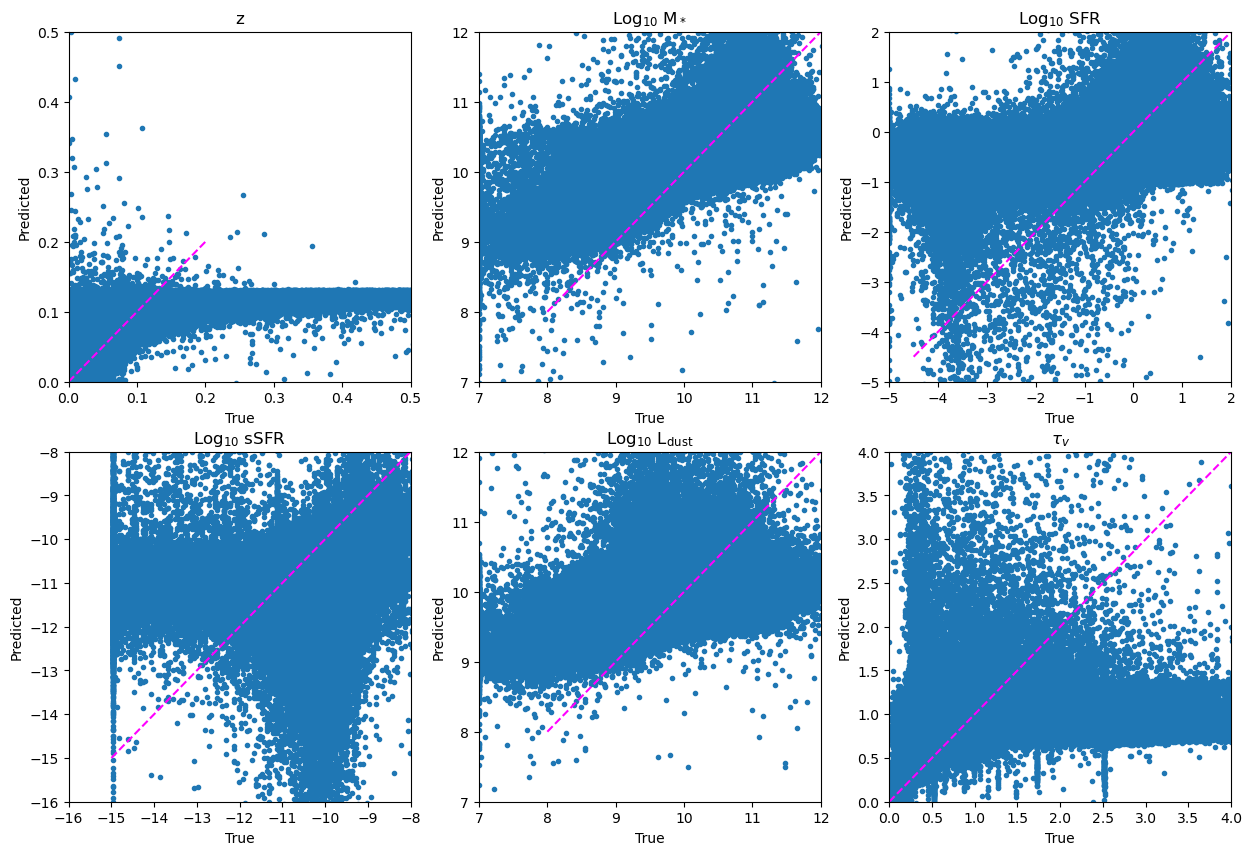

In [82]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=((15,10)))
ax1.errorbar(out_real2.T[0],out_predict2.T[0],fmt='.')
ax2.errorbar(out_real2.T[1],out_predict2.T[1],fmt='.')
ax3.errorbar(out_real2.T[2],out_predict2.T[2],fmt='.')
ax4.errorbar(out_real2.T[3],out_predict2.T[3],fmt='.')
ax5.errorbar(out_real2.T[4],out_predict2.T[4],fmt='.')
ax6.errorbar(out_real2.T[5],out_predict2.T[5],fmt='.')
ax1.errorbar([0,0.2],[0,0.2],linestyle='dashed',color='magenta')
ax2.errorbar([8,12],[8,12],linestyle='dashed',color='magenta')
ax3.errorbar([-4.5,2],[-4.5,2],linestyle='dashed',color='magenta')
ax4.errorbar([-15,-8],[-15,-8],linestyle='dashed',color='magenta')
ax5.errorbar([8,12],[8,12],linestyle='dashed',color='magenta')
ax6.errorbar([0,4],[0,4],linestyle='dashed',color='magenta')
ax1.set_xlim(0,0.5)
ax1.set_ylim(0,0.5)
ax2.set_xlim(7,12)
ax2.set_ylim(7,12)
ax3.set_xlim(-5,2)
ax3.set_ylim(-5,2)
ax4.set_xlim(-16,-8)
ax4.set_ylim(-16,-8)
ax5.set_xlim(7,12)
ax5.set_ylim(7,12)
ax6.set_xlim(0,4)
ax6.set_ylim(0,4)
axs=[ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(6):
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('True')
    axs[i].set_ylabel('Predicted')

<font color='red'>
These results are really bad. The model is not correctly predicting the galaxy properties. Removing the bad data might help. My training input data has some bad fluxes, where the flux is 0 or 9.999. The training output also has bad values, which are -99.9. Including bad data in the training set will cause issues with the model.

In [83]:
cond=(output_liza['flag']==1)
input_new_liza=input_liza[cond]
output_new_liza=output_liza[cond]

In [84]:
x_new_liza=np.array([input_new_liza['flux_u'],input_new_liza['flux_g'],input_new_liza['flux_r'],input_new_liza['flux_i'],input_new_liza['flux_z'],input_new_liza['flux_w1'],input_new_liza['flux_w2'],input_new_liza['flux_w3'],input_new_liza['flux_w4']])
y_new_liza=np.array([input_new_liza['redshift'],output_new_liza['lmass50_all'],output_new_liza['lsfr50_all'],output_new_liza['lssfr50_all'],output_new_liza['ldust50_all'],output_new_liza['tau_v50_all']])

length_train2=len(x_new_liza.T)

x_new2=np.concatenate((x_new_liza.T,x_test.T))
y_new2=np.concatenate((y_new_liza.T,y_test.T))
scaler_input2=sklearn.preprocessing.RobustScaler()
scaler_input2.fit(x_new2)
norm_x2=scaler_input2.transform(x_new2)
scaler_output2=sklearn.preprocessing.RobustScaler()
scaler_output2.fit(y_new2)
norm_y2=scaler_output2.transform(y_new2)

norm_x_new_liza=norm_x2[:length_train2]
norm_x_test2=norm_x2[length_train2:]
norm_y_new_liza=norm_y2[:length_train2]
norm_y_test2=norm_y2[length_train2:]

In [85]:
regr3 = MLPRegressor(random_state=69, max_iter=1000,hidden_layer_sizes=(100,100,100,100)).fit(norm_x_new_liza, norm_y_new_liza)

In [86]:
prediction3=regr3.predict(norm_x_test2)

In [87]:
out_predict3=scaler_output2.inverse_transform(prediction3)
out_real3=scaler_output2.inverse_transform(norm_y_test2)

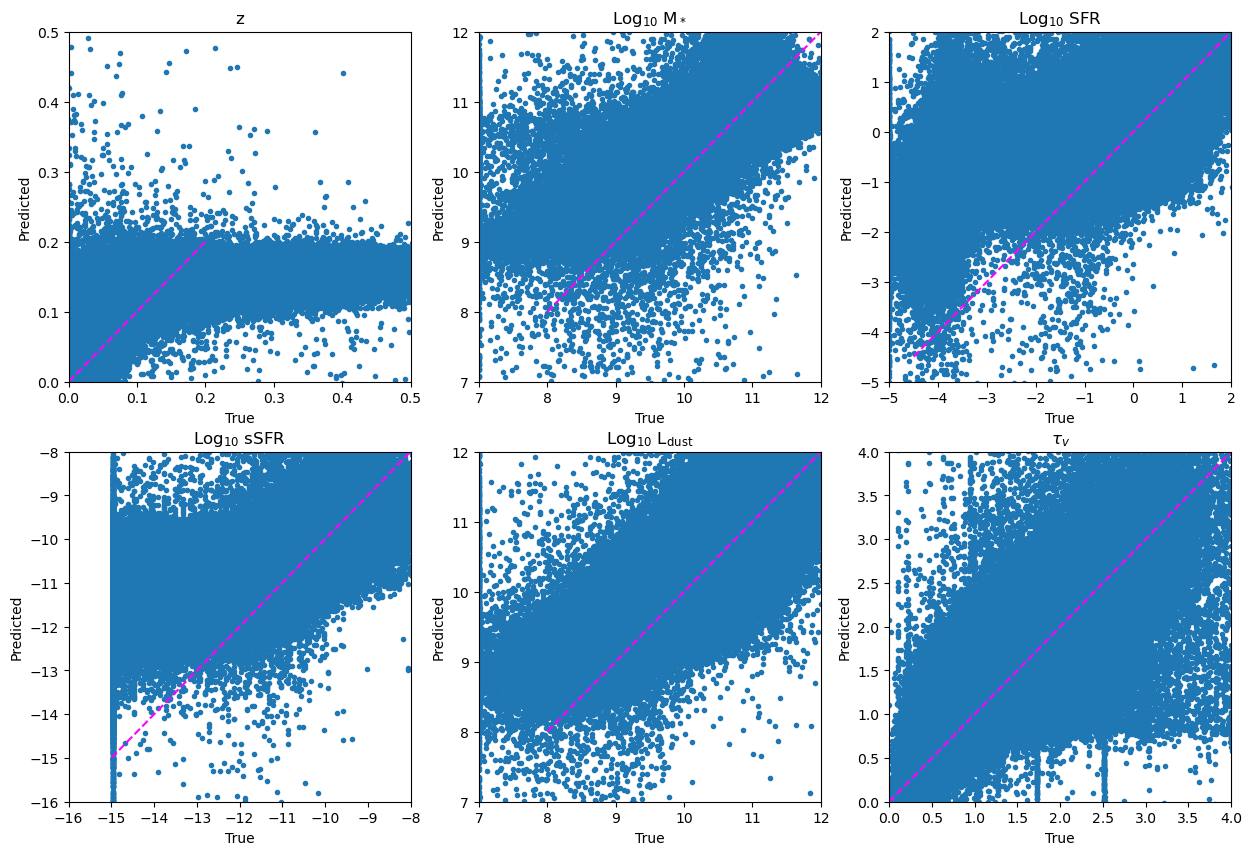

In [88]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=((15,10)))

ax1.errorbar(out_real3.T[0],out_predict3.T[0],fmt='.')
ax2.errorbar(out_real3.T[1],out_predict3.T[1],fmt='.')
ax3.errorbar(out_real3.T[2],out_predict3.T[2],fmt='.')
ax4.errorbar(out_real3.T[3],out_predict3.T[3],fmt='.')
ax5.errorbar(out_real3.T[4],out_predict3.T[4],fmt='.')
ax6.errorbar(out_real3.T[5],out_predict3.T[5],fmt='.')
ax1.errorbar([0,0.2],[0,0.2],linestyle='dashed',color='magenta')
ax2.errorbar([8,12],[8,12],linestyle='dashed',color='magenta')
ax3.errorbar([-4.5,2],[-4.5,2],linestyle='dashed',color='magenta')
ax4.errorbar([-15,-8],[-15,-8],linestyle='dashed',color='magenta')
ax5.errorbar([8,12],[8,12],linestyle='dashed',color='magenta')
ax6.errorbar([0,4],[0,4],linestyle='dashed',color='magenta')
ax1.set_xlim(0,0.5)
ax1.set_ylim(0,0.5)
ax2.set_xlim(7,12)
ax2.set_ylim(7,12)
ax3.set_xlim(-5,2)
ax3.set_ylim(-5,2)
ax4.set_xlim(-16,-8)
ax4.set_ylim(-16,-8)
ax5.set_xlim(7,12)
ax5.set_ylim(7,12)
ax6.set_xlim(0,4)
ax6.set_ylim(0,4)
axs=[ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(6):
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('True')
    axs[i].set_ylabel('Predicted')

<font color='red'>

The results are still bad. This was to be expected since the total training set only has 254 galaxies. When removing the flagged galaxy fits from the training set, only 119 galaxies remain. Regardless, neither training set has enough galaxies to properly train the neural network. The fit is slightly better when removing the bad flags but it is still a horrible result.

#### Question 5 [bonus]

Repeat steps 1-4 for the *compressed* dataset. Do you see any differences in performance?

#### Question 6 [bonus]

Think back to the results you got from clustering. Does the model work equally well for galaxies in the different clusters?

In [89]:
# Placeholder